<a href="https://colab.research.google.com/github/dhyu12/yolov3/blob/master/PyTorch_YOLOv3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch-YOLOv3

- 깃헙 원문링크: https://github.com/eriklindernoren/PyTorch-YOLOv3
- PyTorch 로 구현한 YOLOv3 를 Colaboratory 에서 실행해보자. 
- Coloaboratory 의 런타임 >> 런타임 유형변경에서 GPU 사용을 체크하는 것을 잊지말자

## 우선 git clone


In [37]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 724, done.
remote: Total 724 (delta 0), reused 0 (delta 0), pack-reused 724
Receiving objects: 100% (724/724), 16.18 MiB | 21.18 MiB/s, done.
Resolving deltas: 100% (411/411), done.


## 폴더 이동후 필요한 package 를 설치해준다

In [38]:
cd PyTorch-YOLOv3/

/content/PyTorch-YOLOv3/PyTorch-YOLOv3/PyTorch-YOLOv3


In [39]:
!pip3 install -r requirements.txt

## 에러 발생. 
- torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
- Pillow 버전이 맞지 않는다고 하니 기존의 Pillow 를 uninstall 한 다음 최신으로 install 해준다. 

In [18]:
!pip3 uninstall Pillow -y

Uninstalling Pillow-7.0.0:
  Successfully uninstalled Pillow-7.0.0


In [19]:
!pip3 install Pillow


     |████████████████████████████████| 2.2MB 4.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## 이미 학습 완료한 weight 를 다운로드 받는다

In [20]:
cd weights/

/content/PyTorch-YOLOv3/PyTorch-YOLOv3/weights


In [21]:
# 스크립트 내용을 한 번 볼까? 
!cat /content/PyTorch-YOLOv3/weights/download_weights.sh

#!/bin/bash
# Download weights for vanilla YOLOv3
wget -c https://pjreddie.com/media/files/yolov3.weights
# # Download weights for tiny YOLOv3
wget -c https://pjreddie.com/media/files/yolov3-tiny.weights
# Download weights for backbone network
wget -c https://pjreddie.com/media/files/darknet53.conv.74


In [22]:
!bash download_weights.sh

--2020-08-26 15:56:07--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   803KB/s    in 4m 21s  

2020-08-26 16:00:30 (926 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2020-08-26 16:00:30--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   743KB/s    in 46s     

2020-08-26 16:01:17 (751 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--2020-

# 이제 예측을 해보자 
- 상위 폴더로 이동후 
- detect.py 파일을 실행하자
- 이때 --image_folder 옵션에 이미지들이 들어있는 폴더를 지정해주면 된다. 

In [23]:
cd ..

/content/PyTorch-YOLOv3/PyTorch-YOLOv3


In [24]:
!python3 detect.py --image_folder data/samples

Namespace(batch_size=1, checkpoint_model=None, class_path='data/coco.names', conf_thres=0.8, image_folder='data/samples', img_size=416, model_def='config/yolov3.cfg', n_cpu=0, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.081218
	+ Batch 1, Inference Time: 0:00:00.062835
	+ Batch 2, Inference Time: 0:00:00.059027
	+ Batch 3, Inference Time: 0:00:00.062240
	+ Batch 4, Inference Time: 0:00:00.053464
	+ Batch 5, Inference Time: 0:00:00.067132
	+ Batch 6, Inference Time: 0:00:00.044184
	+ Batch 7, Inference Time: 0:00:00.044632
	+ Batch 8, Inference Time: 0:00:00.039369

Saving images:
(0) Image: 'data/samples/dog.jpg'
	+ Label: dog, Conf: 0.99335
	+ Label: bicycle, Conf: 0.99981
	+ Label: truck, Conf: 0.94229
(1) Image: 'data/samples/eagle.jpg'
	+ Label: bird, Conf: 0.99703
(2) Image: 'data/samples/field.jpg'
	+ Label: person, Conf: 0.99996
	+ Label: horse, Conf: 0.99977
	+ Label: dog, Conf: 0.99409
(3) Image: 'data

In [25]:
cd data/

/content/PyTorch-YOLOv3/PyTorch-YOLOv3/data


## 기본 제공하는 sample 폴더 내용을 확인해보자

In [26]:
ls -al /content/PyTorch-YOLOv3/data/samples/

total 1320
drwxr-xr-x 2 root root   4096 Aug 26 14:02 ./
drwxr-xr-x 5 root root   4096 Aug 26 14:48 ../
-rw-r--r-- 1 root root 163759 Aug 26 14:02 dog.jpg
-rw-r--r-- 1 root root 141886 Aug 26 14:02 eagle.jpg
-rw-r--r-- 1 root root 113880 Aug 26 14:02 field.jpg
-rw-r--r-- 1 root root 382965 Aug 26 14:02 giraffe.jpg
-rw-r--r-- 1 root root 133495 Aug 26 14:02 herd_of_horses.jpg
-rw-r--r-- 1 root root 126867 Aug 26 14:02 messi.jpg
-rw-r--r-- 1 root root  78771 Aug 26 14:02 person.jpg
-rw-r--r-- 1 root root  84988 Aug 26 14:02 room.jpg
-rw-r--r-- 1 root root 102770 Aug 26 14:02 street.jpg


## 이미지 하나를 뿌려보자

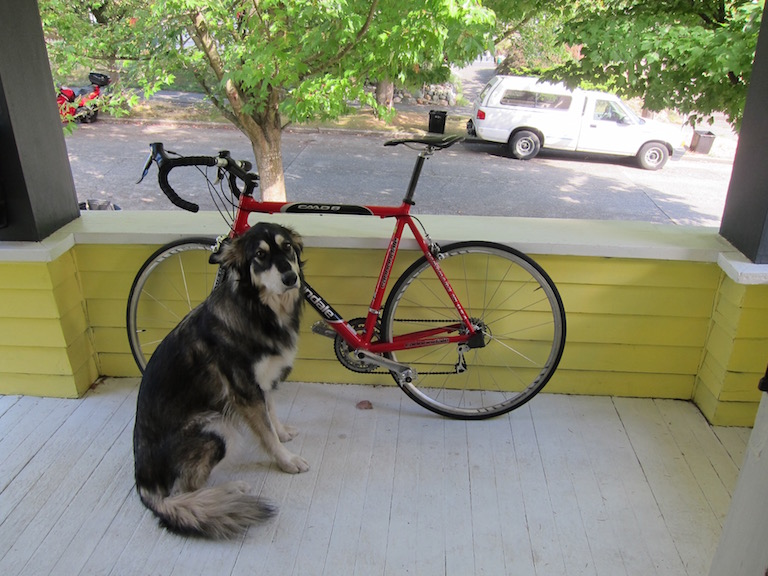

In [40]:
from IPython.display import Image
Image('/content/PyTorch-YOLOv3/data/samples/dog.jpg')

## YOLO가 예측하여 사각형을 그린 이미지를 확인해보자

In [28]:
ls -al /content/PyTorch-YOLOv3/output/

total 2584
drwxr-xr-x  2 root root   4096 Aug 26 14:47 ./
drwxr-xr-x 11 root root   4096 Aug 26 15:55 ../
-rw-r--r--  1 root root 328823 Aug 26 14:47 dog.png
-rw-r--r--  1 root root 304186 Aug 26 14:47 eagle.png
-rw-r--r--  1 root root 298941 Aug 26 14:47 field.png
-rw-r--r--  1 root root 383002 Aug 26 14:47 giraffe.png
-rw-r--r--  1 root root 264304 Aug 26 14:47 herd_of_horses.png
-rw-r--r--  1 root root 244138 Aug 26 14:47 messi.png
-rw-r--r--  1 root root 183744 Aug 26 14:47 person.png
-rw-r--r--  1 root root 315670 Aug 26 14:47 room.png
-rw-r--r--  1 root root 297980 Aug 26 14:47 street.png


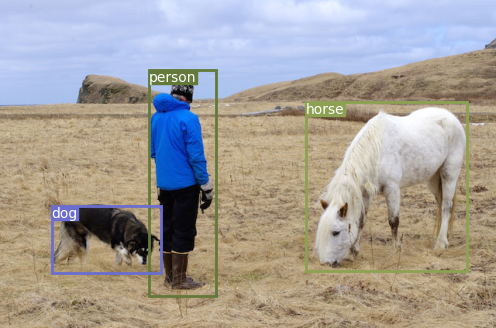

In [29]:
Image('/content/PyTorch-YOLOv3/output/field.png')


# 내 Drive 내의 이미지에 접근해보자. 
- Colaboratory 에 파일을 올리는 방법은 여러가지가 있는데 
- 여기서는 google Drive 에 접근하여 미리 올려둔 이미지를 이용하도록 한다. 

### 아래 구글 계정 인증은 이상하게 한번에 안된다. 
- 한번 에러나고 나면
- 다시 실행하자 

In [ ]:
cd /content/PyTorch-YOLOv3/

/content/PyTorch-YOLOv3


In [ ]:
ls -al

total 128
drwxr-xr-x 10 root root  4096 Aug 25 16:03 ./
drwxr-xr-x  1 root root  4096 Aug 25 15:58 ../
drwxr-xr-x  2 root root  4096 Aug 25 15:58 assets/
drwxr-xr-x  2 root root  4096 Aug 25 15:58 config/
drwxr-xr-x  4 root root  4096 Aug 25 15:58 data/
-rw-r--r--  1 root root  5354 Aug 25 15:58 detect.py
drwxr-xr-x  8 root root  4096 Aug 25 15:58 .git/
-rw-r--r--  1 root root   104 Aug 25 15:58 .gitignore
-rw-r--r--  1 root root 35127 Aug 25 15:58 LICENSE
-rw-r--r--  1 root root 14899 Aug 25 15:58 models.py
drwxr-xr-x  2 root root  4096 Aug 25 16:03 output/
drwxr-xr-x  2 root root  4096 Aug 25 16:03 __pycache__/
-rw-r--r--  1 root root  6437 Aug 25 15:58 README.md
-rw-r--r--  1 root root    90 Aug 25 15:58 requirements.txt
-rw-r--r--  1 root root  4004 Aug 25 15:58 test.py
-rw-r--r--  1 root root  6732 Aug 25 15:58 train.py
drwxr-xr-x  3 root root  4096 Aug 25 16:03 utils/
drwxr-xr-x  2 root root  4096 Aug 25 16:01 weights/


## 아래 스크립트는 그냥 실행하자.
- 링크가 나오면 클릭하여 구글인증을 하고 
- Verification code 를 입력해주면 된다. 
- 오류가 나면 이 셀을 다시 실행해서 반복해주면 된다

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

## 디렉토리를 만들고 mount 해주면 쓸 수 있게 된다. 
- drive 폴더로 들어가보면 인증한 구글계정의 구글 드라이브 라는 것을 알 수 있다.

In [ ]:
!mkdir -p drive 
!google-drive-ocamlfuse drive 

## 이제 예측을 해보자 
- 예를 들어 google drive 의 test_images 라는 폴더에 테스트할 jpg 이미지들을 넣어두었다면
- 아래와 같이 predict 해주면 된다. 

In [ ]:
!python3 detect.py --image_folder /content/PyTorch-YOLOv3/drive/test_images

Namespace(batch_size=1, checkpoint_model=None, class_path='data/coco.names', conf_thres=0.8, image_folder='/content/PyTorch-YOLOv3/drive/test_images', img_size=416, model_def='config/yolov3.cfg', n_cpu=0, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:

Saving images:


## 마찬가지로 output 폴더에 가보면 결과를 확인할 수 있다. 

In [ ]:
ls -al output/

total 2584
drwxr-xr-x  2 root root   4096 Aug 25 16:03 ./
drwxr-xr-x 11 root root   4096 Aug 25 16:17 ../
-rw-r--r--  1 root root 328733 Aug 25 16:03 dog.png
-rw-r--r--  1 root root 304243 Aug 25 16:03 eagle.png
-rw-r--r--  1 root root 298682 Aug 25 16:03 field.png
-rw-r--r--  1 root root 383079 Aug 25 16:03 giraffe.png
-rw-r--r--  1 root root 264234 Aug 25 16:03 herd_of_horses.png
-rw-r--r--  1 root root 244651 Aug 25 16:03 messi.png
-rw-r--r--  1 root root 183520 Aug 25 16:03 person.png
-rw-r--r--  1 root root 315555 Aug 25 16:03 room.png
-rw-r--r--  1 root root 297534 Aug 25 16:03 street.png


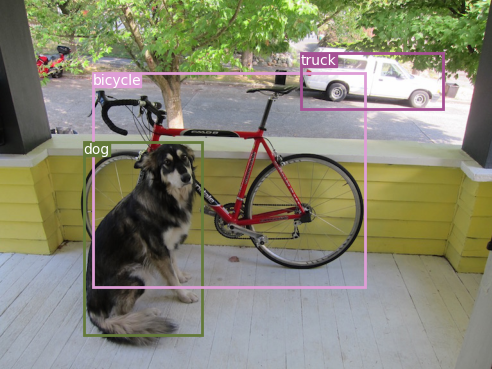

In [ ]:
Image('output/dog.png')

In [ ]:
ls -al 

total 156
drwxr-xr-x 13 root root  4096 Aug 25 17:20 ./
drwxr-xr-x  1 root root  4096 Aug 25 16:17 ../
drwxr-xr-x  2 root root  4096 Aug 25 15:58 assets/
drwxr-xr-x  2 root root  4096 Aug 25 16:20 checkpoints/
drwxr-xr-x  2 root root  4096 Aug 25 17:17 config/
drwxr-xr-x  4 root root  4096 Aug 25 16:58 data/
-rw-r--r--  1 root root  5354 Aug 25 15:58 detect.py
drwxr-xr-x  2 root root  4096 Aug 25 16:17 drive/
drwxr-xr-x  8 root root  4096 Aug 25 15:58 .git/
-rw-r--r--  1 root root   104 Aug 25 15:58 .gitignore
-rw-r--r--  1 root root 35127 Aug 25 15:58 LICENSE
drwxr-xr-x  2 root root  4096 Aug 25 17:20 logs/
-rw-r--r--  1 root root 14899 Aug 25 15:58 models.py
drwxr-xr-x  2 root root  4096 Aug 25 16:03 output/
drwxr-xr-x  2 root root  4096 Aug 25 16:17 __pycache__/
-rw-r--r--  1 root root  6437 Aug 25 15:58 README.md
-rw-r--r--  1 root root    90 Aug 25 15:58 requirements.txt
-rw-r--r--  1 root root  4004 Aug 25 15:58 test.py
-rw-r--r--  1 root root  7475 Aug 25 16:48 train.py
drwxr-xr

In [43]:
cd ..

/content/PyTorch-YOLOv3


In [95]:
!python3 train.py

2020-08-26 18:01:50.413912: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Namespace(batch_size=8, checkpoint_interval=1, compute_map=False, data_config='config/custom.data', epochs=10, evaluation_interval=1, gradient_accumulations=2, img_size=416, model_def='config/yolov3.cfg', multiscale_training=True, n_cpu=8, pretrained_weights=None)
2020-08-26 18:01:53.255801: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-08-26 18:01:53.336082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-08-26 18:01:53.336718: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [74]:
!python3 detect.py

Namespace(batch_size=1, checkpoint_model=None, class_path='data/custom/classes.names', conf_thres=0.8, image_folder='data/custom_samples', img_size=416, model_def='config/yolov3.cfg', n_cpu=0, nms_thres=0.4, weights_path='weights/yolov3.weights')

Performing object detection:
	+ Batch 0, Inference Time: 0:00:00.136975

Saving images:
(0) Image: 'data/custom_samples/Plus button.jpg'
